In [ ]:
# Importación de paquetes requeridos

import warnings

import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")
import scipy
import numpy as np

from IPython.display import display, Markdown, Latex

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import dateparser
import json

In [ ]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'lines.linewidth' : 3,
}
pylab.rcParams.update(params)

In [133]:
# Función auxiliar para visualizar los datos
def pp(obj):
    print(json.dumps(obj, indent=2))

In [134]:
# Parmámetros
iga_api_base_url = 'http://ing-acc-movil01/ingenier@/symfony/public/index.php/api'
site_name = 'A06-S001'

In [154]:
display(Markdown(f"# Ejemplo 001: Descarga de los datos completos de un sitio en formato JSON"))

# Ejemplo 001: Descarga de los datos completos de un sitio en formato JSON

In [135]:
# Llamamos a un endpoint de prueba en la API de IGA para verificar conectividad
display(Markdown("### IGA API test"))
x = requests.get(iga_api_base_url + '/public/db-sync-state')
pp(x.json())

### IGA API test

{
  "status": "success",
  "data": {
    "Uid": "41156",
    "State": "DB_SYNC_STATE_IDLE",
    "LastSyncTimestamp": "16-05-2022 15:23:21",
    "SyncState": "OK",
    "ProjectsUpdated": "DataManager, Litoral Sur"
  }
}


In [136]:
# Llamamos al endpoint site-data para obtener los datos completos de un sitio
payload = {
  "siteName": site_name,
  "includeKpiData": True,
  "includeNeighborData": False,
  "formatVersion": "2"
}
x = requests.post(iga_api_base_url + '/public/site-data', json=payload)
response = x.json()
site_data = response["data"]

In [137]:
# Visualizamos el payload completo (json) devuelto por la API:
display(site_data)

{'siteGeneralData': {'Name': 'A06-S001',
  'Nombre': 'Altos de Chipion',
  'Latitud': '-30.960311999999998',
  'Longitud': '-62.338603999999997',
  'EMG': 'XACHIP',
  'Status': 'Activo',
  'Proyecto': 'LISU',
  'AdmClase': 'A',
  'AdmCOM': 'LISU',
  'AdmOyM': 'FS CORDOBA NORTE',
  'BusquedaAltura': '60',
  'BusquedaRadio': '2000',
  'EstructuraAltura': '60',
  'EstructuraBasamento': '0',
  'EstructuraClase': 'Cooperativa',
  'EstructuraPropietario': 'Cooperativa',
  'EstructuraTipo': 'Torre autosoportada convencional',
  'FechaOnAir': '01/01/2013 00:00:00',
  'FechaSLS': '01/01/2013 00:00:00',
  'CodLocalidad': 'AR-CB-SJT-020000',
  'GeoProvincia': 'Córdoba',
  'GeoDepartamento': 'San Justo',
  'GeoLocalidad': 'Altos de Chipión',
  'GeoDireccion': 'Mariano Moreno 377',
  'GeoRegion': 'MEDI',
  'CodigoImplem': 'G3@850+G3@1900+U3@850+L3@1900+L3@700+L3@AWS',
  'Vendor2G': 'Huawei',
  'Vendor3G': 'Huawei',
  'Vendor4G': 'Huawei',
  'ID CNC': '122',
  'Provincia CNC': 'Cordoba',
  'Departam

In [153]:
# Visualizamos por separado algunas porciones del payload
display(Markdown(f"# Site Data - Sitio: {site_name}"))
display(Markdown("---"))

display(Markdown("### siteGeneralData"))
display(pd.DataFrame([site_data["siteGeneralData"]]))

display(Markdown("### siteVisualizationData"))
display(pd.DataFrame([site_data["siteVisualizationData"]]))

display(Markdown("### sectorVisualizationData"))
display(pd.DataFrame(site_data["sectorVisualizationData"]))

display(Markdown("### sector2GData"))
display(pd.DataFrame(site_data["sector2GData"]))

display(Markdown("### sector3GData"))
display(pd.DataFrame(site_data["sector3GData"]))

display(Markdown("### sector4GData"))
display(pd.DataFrame(site_data["sector4GData"]))

display(Markdown("### sector5GData"))
display(pd.DataFrame(site_data["sector5GData"]))

# Site Data - Sitio: A06-S001

---

### siteGeneralData

,Name,Nombre,Latitud,Longitud,EMG,Status,Proyecto,AdmClase,AdmCOM,AdmOyM,...,GeoDireccion,GeoRegion,CodigoImplem,Vendor2G,Vendor3G,Vendor4G,ID CNC,Provincia CNC,Departamento CNC,Localidad CNC
0,A06-S001,Altos de Chipion,-30.960311999999998,-62.338603999999997,XACHIP,Activo,LISU,A,LISU,FS CORDOBA NORTE,...,Mariano Moreno 377,MEDI,G3@850+G3@1900+U3@850+L3@1900+L3@700+L3@AWS,Huawei,Huawei,Huawei,122,Cordoba,San Justo,Altos de Chipion


### siteVisualizationData

,Name,SiteName,SiteStatus,UniversalID,LocationX,LocationY,GeoRegion,BusquedaRadio,Tipologia,StationType,ProjectName,TipoGrilla
0,A06-S001,XACHIP,OA,Altos de Chipion,-62.338603999999997,-30.960311999999998,MEDI,2000,Macro,Macro,LISU,"Grilla_BandaAlta,Grilla_BandaBaja,Grilla_NB-IoT"


### sectorVisualizationData

,SiteName,Name,AntennaID,EffectiveAzimuth,HorizontalBeamwidth,TechnologyBand,SectorStatus,AntennaLocationX,AntennaLocationY
0,A06-S001,XACHIPB11,5,0.0,65.0,LTE FDD_700MHz_9312_NB_IoT,No Operativo,-62.338603999999997,-30.960311999999998
1,A06-S001,XACHIPB12,6,120.0,65.0,LTE FDD_700MHz_9312_NB_IoT,No Operativo,-62.338603999999997,-30.960311999999998
2,A06-S001,XACHIPB13,7,240.0,65.0,LTE FDD_700MHz_9312_NB_IoT,No Operativo,-62.338603999999997,-30.960311999999998
3,A06-S001,XACHIPG11,2,0.0,63.0,GSM1900,Operativo,-62.338603999999997,-30.960311999999998
4,A06-S001,XACHIPG12,3,120.0,63.0,GSM1900,Operativo,-62.338603999999997,-30.960311999999998
5,A06-S001,XACHIPG13,4,240.0,63.0,GSM1900,Operativo,-62.338603999999997,-30.960311999999998
6,A06-S001,XACHIPH11,2,0.0,67.0,GSM850,Operativo,-62.338603999999997,-30.960311999999998
7,A06-S001,XACHIPH12,3,120.0,67.0,GSM850,Operativo,-62.338603999999997,-30.960311999999998
8,A06-S001,XACHIPH13,4,240.0,67.0,GSM850,Operativo,-62.338603999999997,-30.960311999999998
9,A06-S001,XACHIPL11,5,1.0,62.0,LTE FDD_AWS_2225,Operativo,-62.338603999999997,-30.960311999999998


### sector2GData

,SiteName,SectorName,LAC,RAC,HoppingType,DtxEnabled,PAPowerDBm,TargetReceiveLevelDBm,ColorCode,CarrierType,ARFCN,TrxID,MAIO,HSN,BaseStationType
0,A06-S001,XACHIPG11,620,1,0,False,41.799999999999997,-97.0,13,BCCH_GSM1900_Refarming,718,1,-1,-1,BBU 3900
1,A06-S001,XACHIPG12,620,1,0,False,41.799999999999997,-97.0,65,BCCH_GSM1900_Refarming,716,1,-1,-1,BBU 3900
2,A06-S001,XACHIPG13,620,1,0,False,41.799999999999997,-97.0,54,BCCH_GSM1900_Refarming,712,1,-1,-1,BBU 3900
3,A06-S001,XACHIPH11,620,1,0,True,41.799999999999997,-104.0,14,BCCH_GSM850_Refarming,178,1,-1,-1,BBU 3900
4,A06-S001,XACHIPH12,620,1,0,False,41.799999999999997,-104.0,16,BCCH_GSM850_Refarming,180,1,-1,-1,BBU 3900
5,A06-S001,XACHIPH13,620,1,0,False,41.799999999999997,-104.0,07,BCCH_GSM850_Refarming,238,1,-1,-1,BBU 3900


### sector3GData

,SiteName,SectorName,LAC,RAC,SAC,URA,ScramblingCodeIndex,PaPowerDBm,CPICH_PowerDBm,UARFCN_DL,ActivatedStandard,BaseStationType,UTRAN_Cell_ID
0,A06-S001,XACHIPV11,681,1,611,681,495,46.0,33.0,4358.0,3,BBU 3900,13369955
1,A06-S001,XACHIPV12,681,1,612,681,450,46.0,33.0,4358.0,3,BBU 3900,13369956
2,A06-S001,XACHIPV13,681,1,613,681,244,46.0,33.0,4358.0,3,BBU 3900,13369957
3,A06-S001,XACHIPV21,681,1,185,681,495,46.0,33.0,4379.0,3,BBU 3900,13369529
4,A06-S001,XACHIPV22,681,1,186,681,450,46.0,33.0,4379.0,3,BBU 3900,13369530
5,A06-S001,XACHIPV23,681,1,187,681,244,46.0,33.0,4379.0,3,BBU 3900,13369531


### sector4GData

,SiteName,SectorName,ENodebId,TAC,PhysicalCellId,LogicalCellId,PaPowerDBm,DownlinkEarfcn,UplinkEarfcn,BaseStationType,EUTRAN_Cell_ID,RefSignalBoostingDB,FirstZadoffChuSequence,CyclicShiftConfiguration,LimitBestServerCoverageKm
0,A06-S001,XACHIPB11,60001,30600,429,203,38.0,9312.0,27312.0,BBU 3900,15360459,3.0,NaN,NaN,NaN
1,A06-S001,XACHIPB12,60001,30600,430,204,38.0,9312.0,27312.0,BBU 3900,15360460,3.0,NaN,NaN,NaN
2,A06-S001,XACHIPB13,60001,30600,431,205,38.0,9312.0,27312.0,BBU 3900,15360461,3.0,NaN,NaN,NaN
3,A06-S001,XACHIPL11,60001,10681,429,0,50.799999999999997,2225.0,20225.0,BBU 3900,15360256,3.0,128,11,12.199999999999999
4,A06-S001,XACHIPL12,60001,10681,430,1,50.799999999999997,2225.0,20225.0,BBU 3900,15360257,3.0,136,11,12.199999999999999
5,A06-S001,XACHIPL13,60001,10681,431,2,50.799999999999997,2225.0,20225.0,BBU 3900,15360258,3.0,144,11,12.199999999999999
6,A06-S001,XACHIPM11,60001,10681,101,12,50.799999999999997,950.0,18950.0,BBU 3900,15360268,3.0,104,11,12.199999999999999
7,A06-S001,XACHIPM12,60001,10681,100,13,50.799999999999997,950.0,18950.0,BBU 3900,15360269,3.0,112,11,12.199999999999999
8,A06-S001,XACHIPM13,60001,10681,99,14,50.799999999999997,950.0,18950.0,BBU 3900,15360270,3.0,120,11,12.199999999999999
9,A06-S001,XACHIPN11,60001,10681,429,3,47.229999999999997,9360.0,27360.0,BBU 3900,15360259,0.0,506,14,38.799999999999997


### sector5GData

""


In [139]:
# Visualizamos la estructura de los datos de KPI devueltos.
# Aquí podemos ver qué KPIs hay disponibles para cada tecnología, y elegir uno para visualizarlo en forma de gráfica
display(Markdown('### mainKPIData.2G'))
pp(list(site_data['mainKPIData']['2G'].keys()))
display(Markdown('### mainKPIData.3G'))
pp(list(site_data['mainKPIData']['3G'].keys()))
display(Markdown('### mainKPIData.4G'))
pp(list(site_data['mainKPIData']['4G'].keys()))

### mainKPIData.2G

[
  "ProjectNamingType",
  "NetworkNamingType",
  "NamingMatch",
  "Controller",
  "Node",
  "Vendor",
  "TraficoTCHT",
  "MinutosTCHT",
  "AccesibilidadGerencial",
  "CallDropRate",
  "TraficoDatosDL",
  "TraficoDatosUL",
  "IntentosSDCCH",
  "Cei"
]


### mainKPIData.3G

[
  "ProjectNamingType",
  "NetworkNamingType",
  "NamingMatch",
  "Controller",
  "Node",
  "Vendor",
  "TraficoVoz",
  "MinutosVoz",
  "AccesibilidadTotalVoz",
  "DropRABVoz",
  "TraficoDLR99",
  "TraficoULR99",
  "TraficoHSDPA",
  "TraficoHSUPA",
  "AccesibilidadR99",
  "AccesibilidadHSDPA",
  "AccesibilidadHSUPA",
  "DropR99",
  "DropHSDPA",
  "DropHSUPA",
  "UsuariosHSDPA",
  "UsuariosHSUPA",
  "ThroughputHSDPAUser",
  "ThroughputHSUPAUser",
  "Cei"
]


### mainKPIData.4G

[
  "ProjectNamingType",
  "NetworkNamingType",
  "NamingMatch",
  "Controller",
  "Node",
  "Vendor",
  "TraficoDL",
  "TraficoUL",
  "AccesibilidadTotalPaq",
  "ServiceDropRate",
  "UsuariosAvg",
  "ThroughputUserDL",
  "ThroughputUserUL",
  "PRBAvgUsageDL",
  "PRBAvgUsageUL",
  "UserVOLTEAvg",
  "TrafficVOLTEErlang",
  "AccesibilidadTotalVOLTE",
  "DropCallVOLTERate",
  "PacketLossVOLTEDLQCI1",
  "PacketLossVOLTEULQCI1",
  "NB_IOT_Accesibilidad_RRC",
  "NB_IOT_Traffic_DL",
  "NB_IOT_Traffic_UL",
  "NB_IOT_User_Avg",
  "NB_IOT_Throughput_DL",
  "NB_IOT_Throughput_UL",
  "Cei"
]


,XACHIPG11,XACHIPG12,XACHIPG13,XACHIPH11,XACHIPH12,XACHIPH13
2022-04-18,436.0,286.0,545.0,619.0,556.0,701.0
2022-04-19,828.0,294.0,418.0,714.0,506.0,480.0
2022-04-20,463.0,226.0,408.0,725.0,466.0,471.0
2022-04-21,5.0,0.0,4.0,23.0,34.0,317.0
2022-04-24,480.0,221.0,477.0,678.0,510.0,451.0
2022-04-25,462.0,451.0,391.0,793.0,686.0,486.0
2022-04-26,359.0,242.0,414.0,500.0,666.0,344.0
2022-04-27,226.0,356.0,382.0,679.0,1097.0,576.0
2022-04-28,455.0,330.0,378.0,831.0,755.0,641.0
2022-04-29,347.0,316.0,454.0,804.0,551.0,653.0


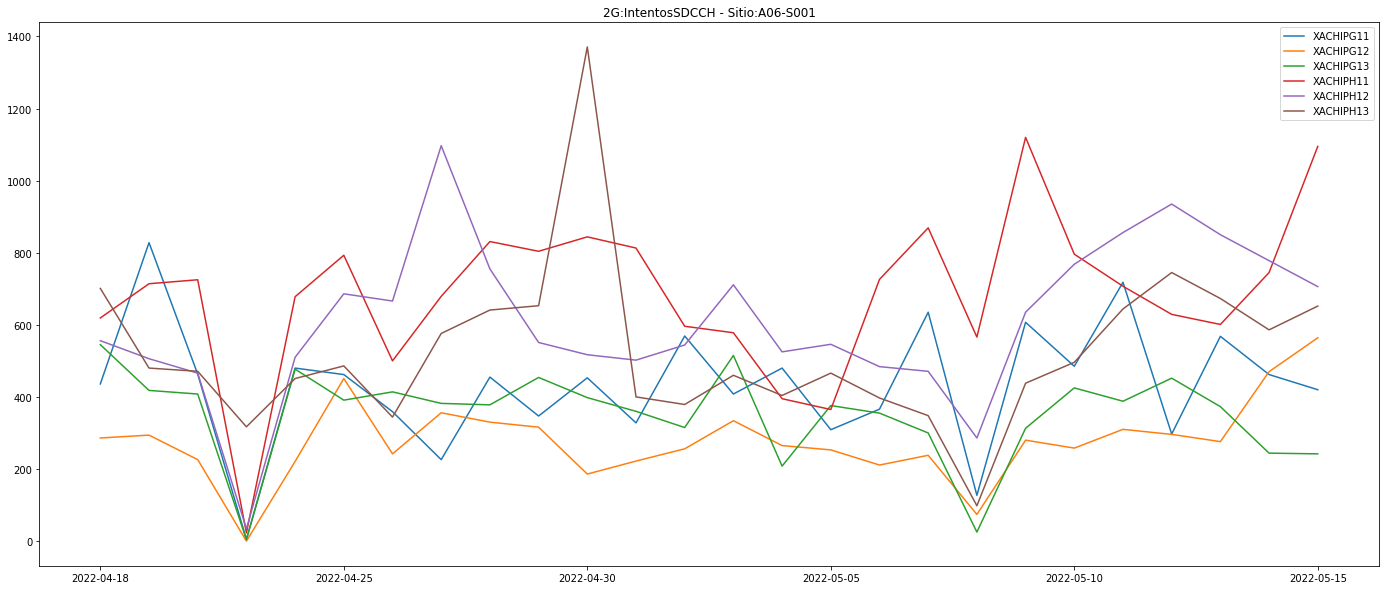

In [152]:
# En tech almacenamos la tecnología deseada: 2G|3G|4G, y en kpi el nombre del indicador.
# Ej: tech='3G', kpi='DropHSDPA'
tech = '2G'
kpi = 'IntentosSDCCH'

# Almacenamos los datos del KPI deseado en la variable kpi_data
kpi_data = site_data['mainKPIData'][tech][kpi]

# Convertimos los datos en un DataFrame de Pandas y aplicamos una serie de transformaciones:
# 1. Ordenamos las fechas en orden creciente con sort_index
# 2. Transponemos la matriz con transpose
# 3. Ordenamos alfabéticamente los nombres de celdas con sort_index
# 4. Volvemos a transponer la matriz con transpose
# 5. Con astype le indicamos que los datos son de tipo float (números de coma flotante)

df=pd.DataFrame(kpi_data).sort_index().transpose().sort_index().transpose().astype(float)

# Visualizamos los datos en formato tabular:
display(df)

# Visualizamos los datos en forma de gráfica:
df.plot.line(title=f"{tech}:{kpi} - Sitio:{site_name}", figsize=(24, 10))
plt.show()